<a href="https://colab.research.google.com/github/sudesh-co/LoanDataAnalysisEDAPRoject/blob/main/LoanDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1 understand structure and content
2 identify key veriables and their distributions
3 look for any pattern to indetify loan eligibilty
4 identify any potential any biases in load approvel  process  
5 summerise our findings

```
# This is formatted as code
```



In [4]:
df = pd.read_csv('/content/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
df.dropna(how = 'all',inplace=True)

In [17]:
for column in df.columns:
    print(f"Null values in {column}: {df[column].isnull().sum()}")

Null values in Loan_ID: 0
Null values in Gender: 13
Null values in Married: 3
Null values in Dependents: 15
Null values in Education: 0
Null values in Self_Employed: 32
Null values in ApplicantIncome: 0
Null values in CoapplicantIncome: 0
Null values in LoanAmount: 22
Null values in Loan_Amount_Term: 14
Null values in Credit_History: 50
Null values in Property_Area: 0
Null values in Loan_Status: 0


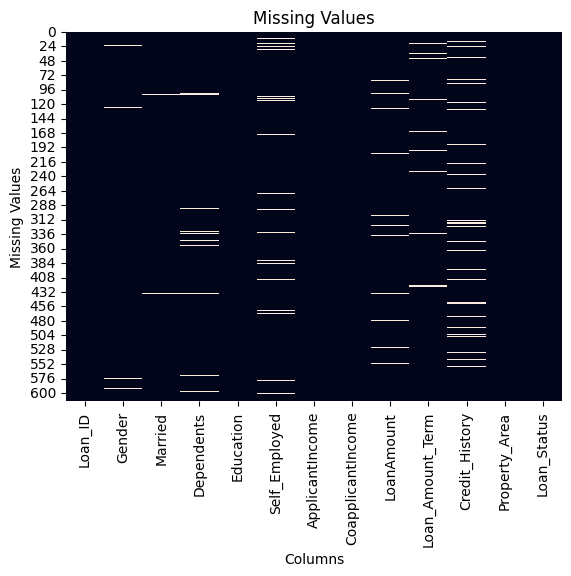

In [21]:
ax = plt.axes()
sns.heatmap(df.isna(), cbar=False, ax=ax)
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Missing Values', fontsize = 10)
plt.show()

In [29]:
df['Credit_History'].dtypes

dtype('float64')

In [30]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [49]:
 df['Dependents'].replace('3+', 3,inplace=True)

In [52]:
pd.to_numeric(df['Dependents'])

,Dependents
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
609,0.0
610,3.0
611,1.0
612,2.0


In [54]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].median())

In [55]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3,51
0.0,15


In [59]:
df['Dependents'].isnull().count()

np.int64(614)

In [64]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [65]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [67]:
for column in df.columns:
    if df[column].dtypes == 'object' and df[column].isnull().sum() > 1:
        try:
            df[column] = pd.to_numeric(df[column])
            df[column].fillna(df[column].median(), inplace=True)
        except Exception as e:
            print(f"Could not convert {column}: {e}")+
    elif df[column].dtypes in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)


Could not convert Married: Unable to parse string "No" at position 0
Could not convert Self_Employed: Unable to parse string "No" at position 0


<ipython-input-67-02a763920d3b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#Distribution of loan amount based on various factores

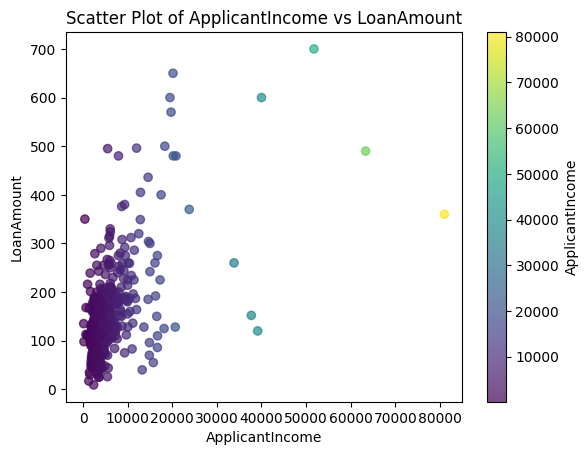

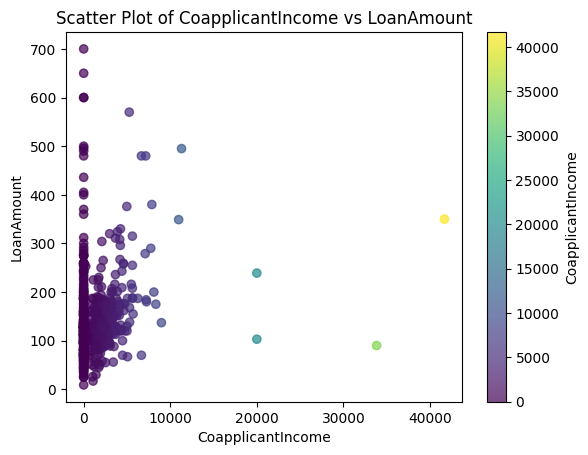

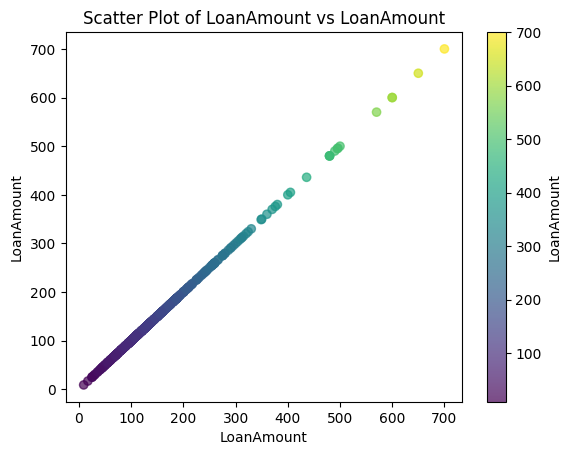

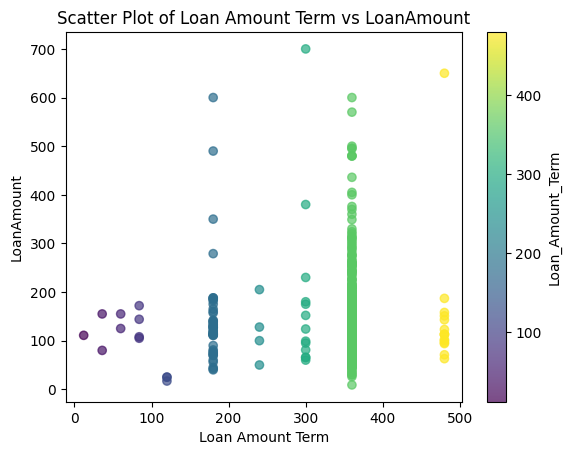

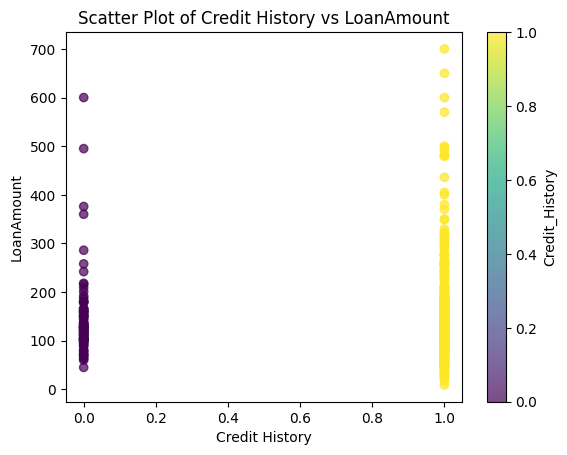

In [101]:
import matplotlib.pyplot as plt

for column in df.columns:
    if df[column].dtypes in ['int64', 'float64']:
        plt.scatter(df[column], df['LoanAmount'], c=df[column], cmap='viridis', alpha=0.7)
        plt.colorbar(label=column)
        plt.title(f"Scatter Plot of {column.replace('_' , ' ')} vs LoanAmount")
        plt.xlabel(column.replace('_' , ' '))
        plt.ylabel('LoanAmount')
        plt.show()


It appears that higher applicant and coapplicant incomes are associated with a lower frequency of taking out loans, while lower incomes are typically associated with smaller loan amounts.

> Add blockquote

> Add blockquote





In [115]:
group_counts = df.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='count')

group_counts['loan_approval_rate'] = group_counts['count'] / len(df)

print(group_counts)


  Property_Area Loan_Status  count  loan_approval_rate
0         Rural           N     69            0.112378
1         Rural           Y    110            0.179153
2     Semiurban           N     54            0.087948
3     Semiurban           Y    179            0.291531
4         Urban           N     69            0.112378
5         Urban           Y    133            0.216612


In [121]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_approval_rate
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,NaN
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,NaN
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,NaN
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,NaN


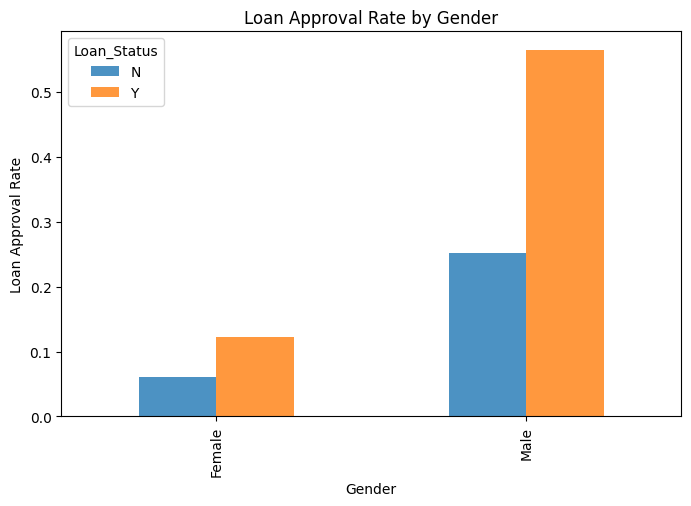

-------------------------------------------------------------------------------------


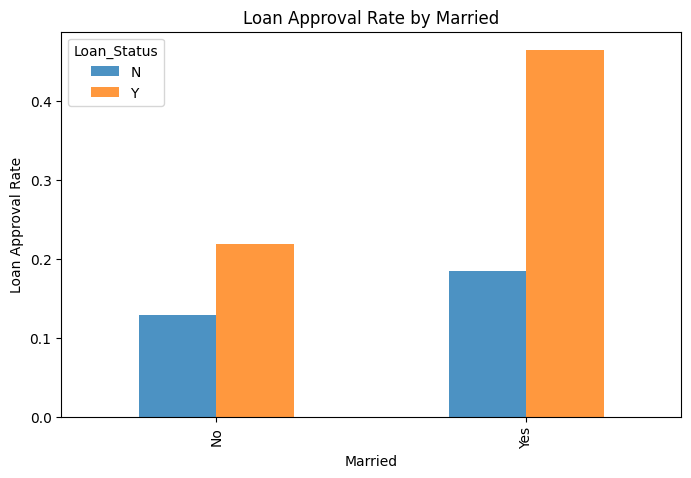

-------------------------------------------------------------------------------------


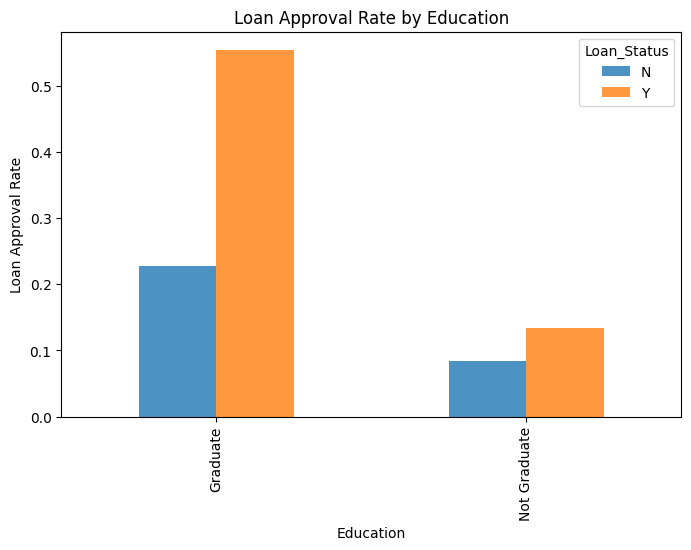

-------------------------------------------------------------------------------------


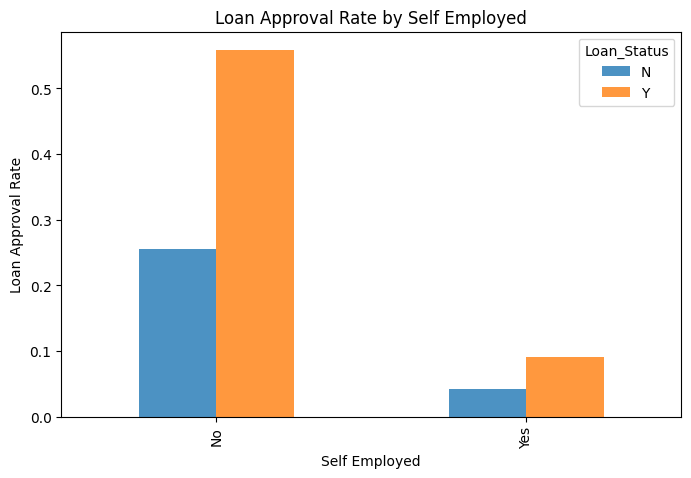

-------------------------------------------------------------------------------------


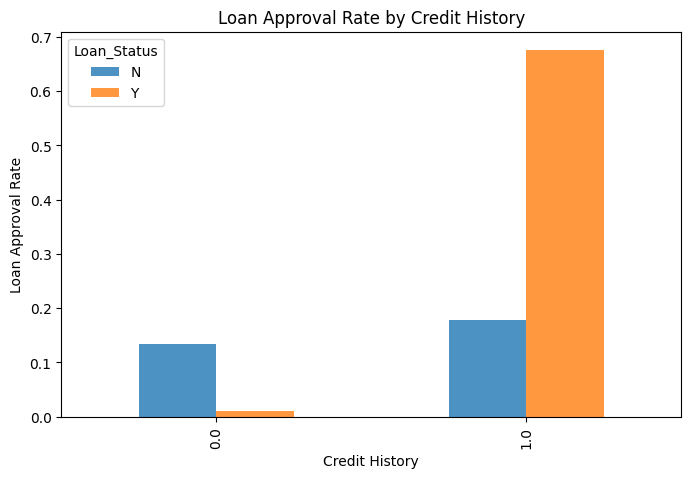

-------------------------------------------------------------------------------------


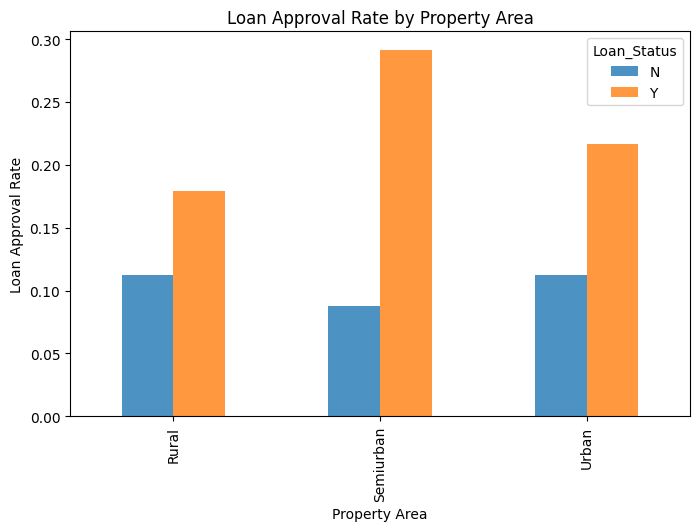

-------------------------------------------------------------------------------------


In [138]:
import matplotlib.pyplot as plt

for column in df.columns:
    if column in ['Education', 'Self_Employed', 'Married', 'Gender', 'Property_Area','Credit_History']:
        group_counts = df.groupby([column, 'Loan_Status']).size().reset_index(name='count')
        group_counts['loan_approval_rate'] = group_counts['count'] / len(df)
        pivot = group_counts.pivot(index=column, columns='Loan_Status', values='loan_approval_rate').fillna(0)
        pivot.plot(kind='bar', figsize=(8, 5), alpha=0.8)
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Loan Approval Rate')
        plt.title(f'Loan Approval Rate by {column.replace("_", " ")}')
        # plt.legend(title='Loan Status')
        plt.show()

        print('-------------------------------------------------------------------------------------')


In [98]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


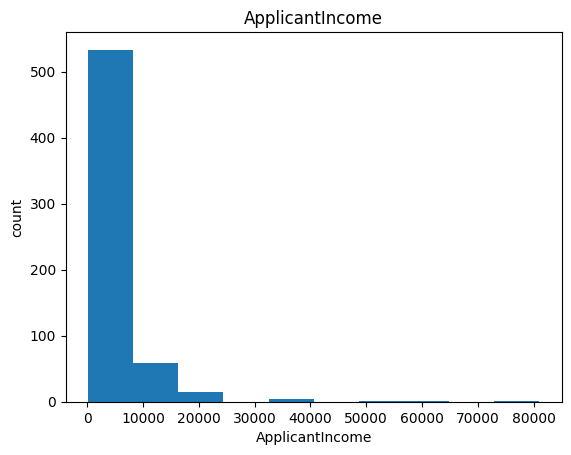

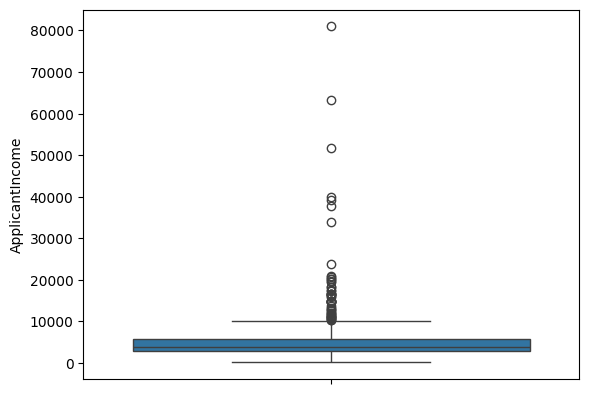

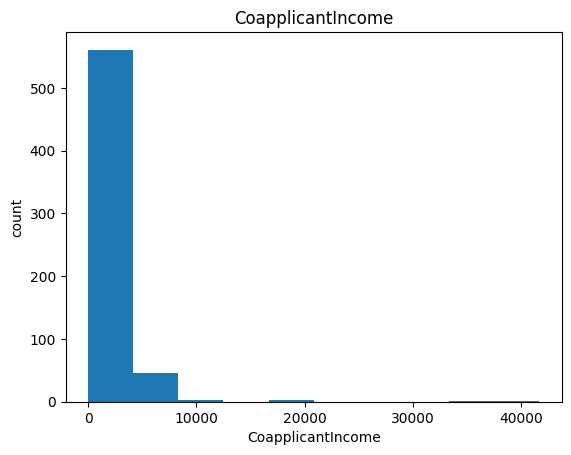

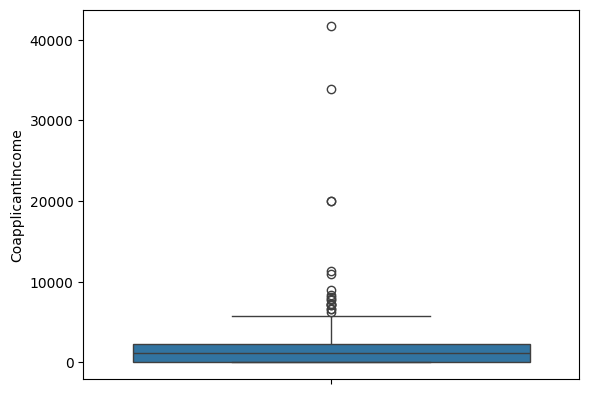

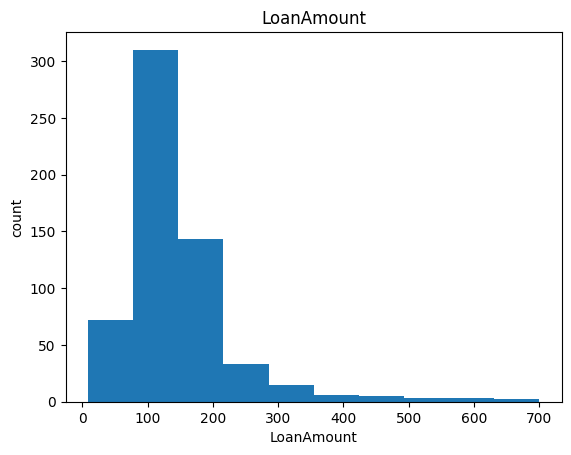

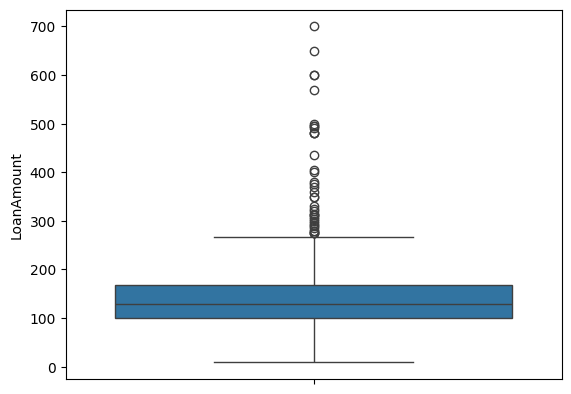

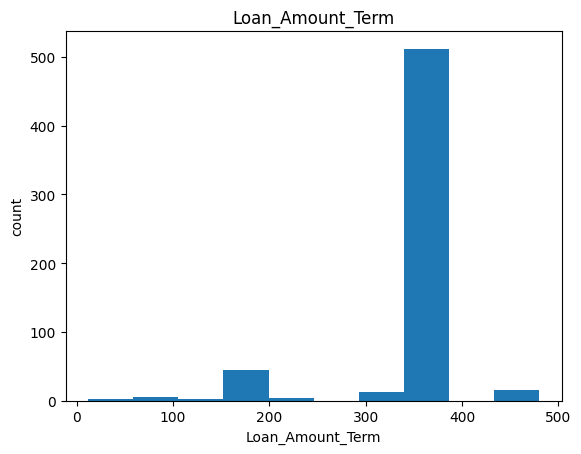

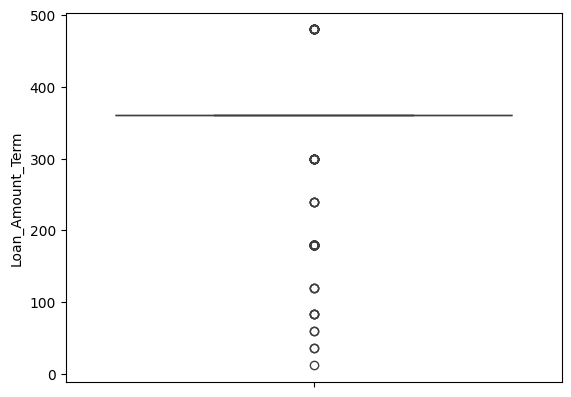

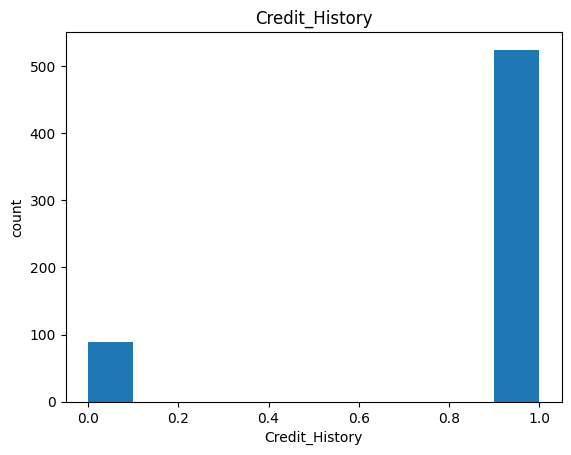

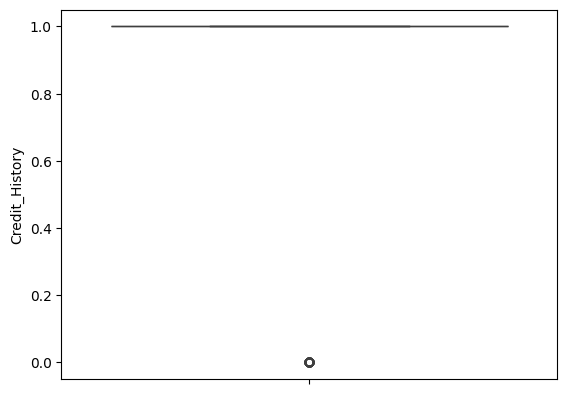

In [33]:
for column in  df.columns:
   if df[column].dtypes  == 'int' or df[column].dtypes  == 'float':
    plt.title(column )
    plt.hist(df[column])
    plt.ylabel('count')
    plt.xlabel(column)
    plt.plot()
    plt.figure()
    sns.boxplot(df[column])
    plt.show()